In [1]:
import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt  
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score,roc_curve # ROC a diferencia del accuracy te da un valor justo de precision para datos desbalanceados

In [2]:
test = 2
bearing = 1
data_type = 'freq'
df = pd.read_csv((f'nasa_bearing_dataset/target_test{test}_bearing_{0}_{data_type}.csv'), index_col=False)

In [3]:
df.drop(columns='Unnamed: 0',inplace=True)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,10231,10232,10233,10234,10235,10236,10237,10238,10239,fault
0,0.010196,0.000138,0.000402,0.000447,0.000449,0.000363,0.000514,0.000086,0.000415,0.000133,...,0.000176,0.000014,0.000063,0.000094,0.000113,0.000063,0.000092,0.000082,0.000068,Normal
1,0.002585,0.000362,0.000223,0.000339,0.000054,0.000424,0.000252,0.000099,0.000097,0.000068,...,0.000099,0.000097,0.000072,0.000218,0.000111,0.000052,0.000030,0.000307,0.000107,Normal
2,0.002484,0.000119,0.000387,0.000168,0.000156,0.000288,0.000440,0.000172,0.000332,0.000333,...,0.000242,0.000064,0.000051,0.000107,0.000094,0.000064,0.000109,0.000065,0.000228,Normal
3,0.002277,0.000317,0.000401,0.000278,0.000095,0.000298,0.000193,0.000402,0.000317,0.000454,...,0.000065,0.000254,0.000223,0.000098,0.000328,0.000155,0.000117,0.000121,0.000194,Normal
4,0.002404,0.000243,0.000249,0.000137,0.000421,0.000081,0.000614,0.000295,0.000125,0.000500,...,0.000006,0.000231,0.000096,0.000165,0.000060,0.000249,0.000121,0.000070,0.000186,Normal


In [5]:
df['fault'].unique()

array(['Normal', 'Outer Race'], dtype=object)

In [6]:
encoder = LabelEncoder()
df['fault'] = encoder.fit_transform(df['fault'])

In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,10231,10232,10233,10234,10235,10236,10237,10238,10239,fault
0,0.010196,0.000138,0.000402,0.000447,0.000449,0.000363,0.000514,0.000086,0.000415,0.000133,...,0.000176,0.000014,0.000063,0.000094,0.000113,0.000063,0.000092,0.000082,0.000068,0
1,0.002585,0.000362,0.000223,0.000339,0.000054,0.000424,0.000252,0.000099,0.000097,0.000068,...,0.000099,0.000097,0.000072,0.000218,0.000111,0.000052,0.000030,0.000307,0.000107,0
2,0.002484,0.000119,0.000387,0.000168,0.000156,0.000288,0.000440,0.000172,0.000332,0.000333,...,0.000242,0.000064,0.000051,0.000107,0.000094,0.000064,0.000109,0.000065,0.000228,0
3,0.002277,0.000317,0.000401,0.000278,0.000095,0.000298,0.000193,0.000402,0.000317,0.000454,...,0.000065,0.000254,0.000223,0.000098,0.000328,0.000155,0.000117,0.000121,0.000194,0
4,0.002404,0.000243,0.000249,0.000137,0.000421,0.000081,0.000614,0.000295,0.000125,0.000500,...,0.000006,0.000231,0.000096,0.000165,0.000060,0.000249,0.000121,0.000070,0.000186,0


In [8]:
df.isna().sum().sum()

np.int64(0)

In [9]:
df.shape

(982, 10241)

In [10]:
# Standardize the features
X = df.drop("fault", axis=1) 
y = df["fault"]
# Standardize the features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# X = pd.DataFrame(X_scaled, columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(785, 10240)
(197, 10240)
(785,)
(197,)


In [12]:
pd.DataFrame(y_train).groupby('fault').agg({'fault':['count']})

,fault
,count
fault,
0,425
1,360


In [13]:
def apply_classifier(clf,xTrain,xTest,yTrain,yTest):

    clf.fit(xTrain, yTrain) #Entrenamiento del modelo
    predictions = clf.predict(xTest) #Validación sobre la data de testing
    conf_mtx = confusion_matrix(yTest,predictions) #Matriz de confusión de la data de testing real con la predicha

    f, axes = plt.subplots(ncols=2, figsize=(15, 5)) #Definición del área de visualización (2 gráficas)

    sns.heatmap(conf_mtx,annot=True,cbar = False,fmt = "g",ax = axes[0])#definición del formato de la matriz de confusión
    axes[0].set_xlabel('Predicted labels') #Titulo del eje x de la matriz de confusión
    axes[0].set_ylabel('True labels') #Titulo del eje y de la matriz de confusión
    axes[0].set_title('Confusion Matrix Test'); #Titulo de la matriz de confusión
    axes[0].xaxis.set_ticklabels(['Normal', 'Outer Race']); #distribución de los resultados en la matriz de confusión del eje x
    axes[0].yaxis.set_ticklabels(['Normal', 'Outer Race']); #distribución de los resultados en la matriz de confusión del eje y

    print(classification_report(yTest,predictions)) #mostrar resultados

    roc_auc = roc_auc_score(yTest,predictions) #definición del cálculo del auc
    print ("AUC ROC : ",roc_auc) #mostrar el resultado

    fpr, tpr,_ = roc_curve(yTest, predictions) #Función para armar la curva ROC
    #fpr : false positive rate
    #tpr : true positive rate
    axes[1].plot(fpr,tpr,label= "auc="+str(roc_auc)); #código para mostrar el resultado del auc en la gráfica
    axes[1].plot([0, 1], [0, 1]) #código del formato de la gráfica
    plt.xlabel('False Positive Rate') #título del eje x
    plt.ylabel('True Positive Rate') #título del eje y
    plt.title('ROC') #título del gráfico

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       111
           1       0.98      0.99      0.98        86

    accuracy                           0.98       197
   macro avg       0.98      0.99      0.98       197
weighted avg       0.98      0.98      0.98       197

AUC ROC :  0.9851770375026189


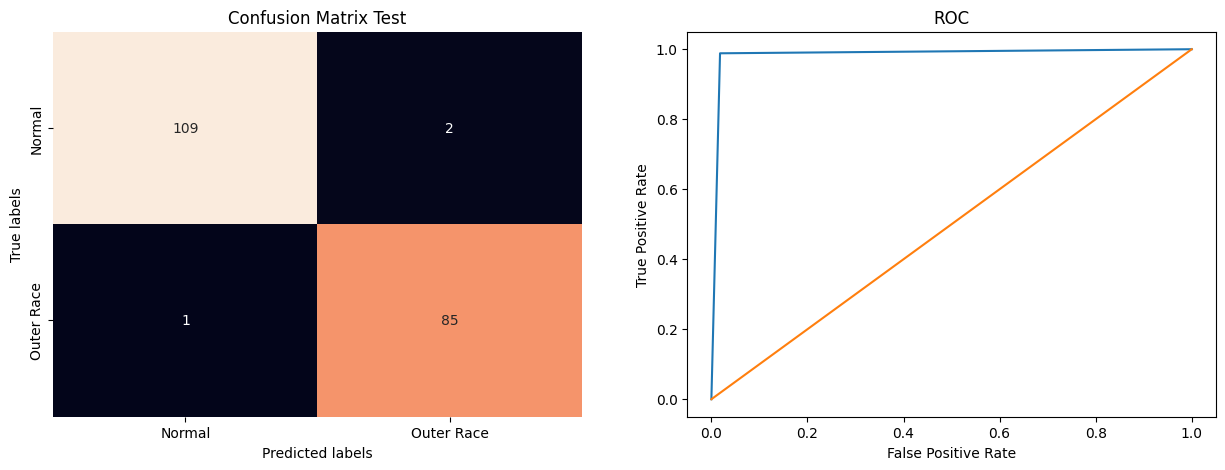

In [14]:
decision_tree = DecisionTreeClassifier() # Definir nuestro modelo
apply_classifier(decision_tree,X_train, X_test, y_train, y_test) # Aplicar la funcion que hemos construido

              precision    recall  f1-score   support

           0       0.72      1.00      0.84       111
           1       1.00      0.50      0.67        86

    accuracy                           0.78       197
   macro avg       0.86      0.75      0.75       197
weighted avg       0.84      0.78      0.76       197

AUC ROC :  0.75


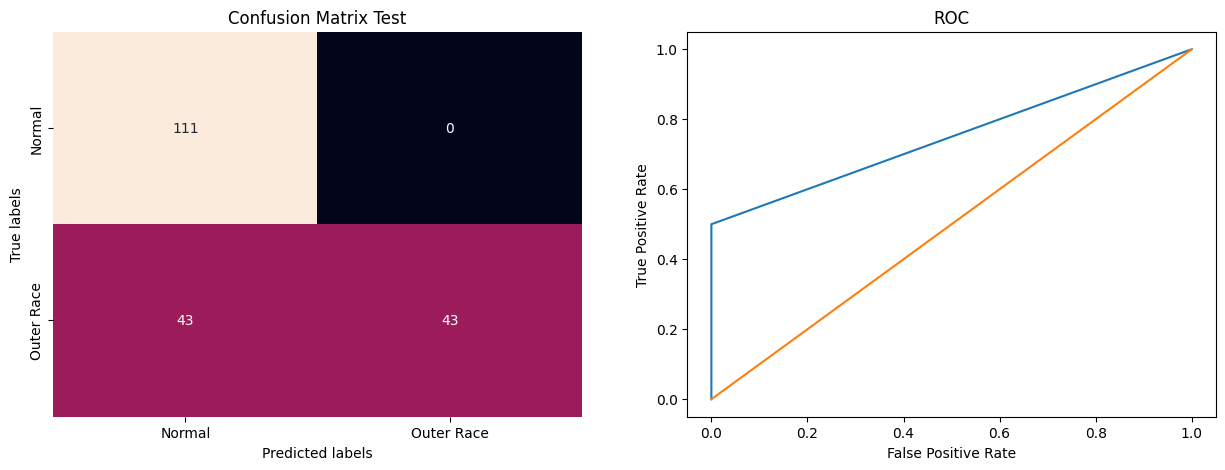

In [15]:
logistic_reg = LogisticRegression()
apply_classifier(logistic_reg,X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       111
           1       0.99      1.00      0.99        86

    accuracy                           0.99       197
   macro avg       0.99      1.00      0.99       197
weighted avg       0.99      0.99      0.99       197

AUC ROC :  0.9954954954954954


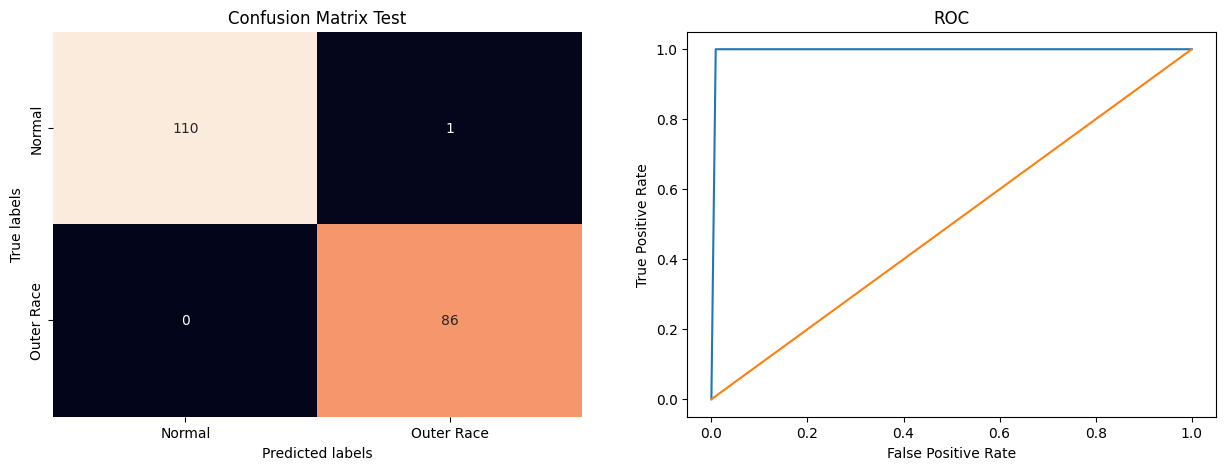

In [16]:
random_forest = RandomForestClassifier(random_state = 42)
apply_classifier(random_forest,X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       111
           1       0.99      0.99      0.99        86

    accuracy                           0.99       197
   macro avg       0.99      0.99      0.99       197
weighted avg       0.99      0.99      0.99       197

AUC ROC :  0.9896815420071234


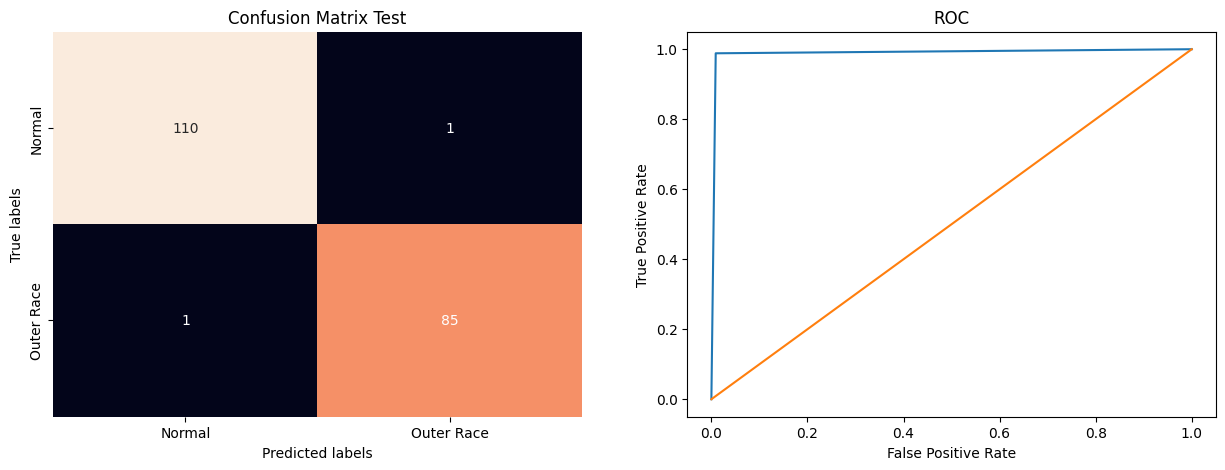

In [17]:
xg_boost = XGBClassifier()
apply_classifier(xg_boost,X_train, X_test, y_train, y_test)